In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy import stats

In [3]:
hr_data = pd.read_csv('HR.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [30]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [31]:
#среднее значение
print (hr_data.mean())

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
salary_num                 1.594706
dtype: float64


In [32]:
#медиана
print (hr_data.median())

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
salary_num                 2.00
dtype: float64


In [15]:
#мода
print (hr_data.mode())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                 3.0            0.0   0.0                    0.0  sales   
1                 NaN            NaN   NaN                    NaN    NaN   

  salary  
0    low  
1    NaN  


In [16]:
#минимум 
print (hr_data.min())

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object


In [17]:
#максимум 
print (hr_data.max())

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object


In [19]:
#среднеквадратичное отклонение
print (hr_data.std())

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64
0.24863065106114257


In [ ]:
3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [19]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [4]:
def rename (x):
    if x == 'low':
        return 1
    elif x == 'medium':
        return 2
    else:
        return 3
hr_data['salary_num'] = hr_data['salary'].apply(rename)
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


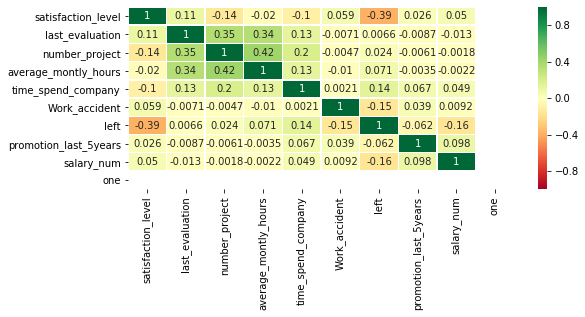

In [13]:
import seaborn as sns
ax = sns.heatmap(hr_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.4, center = 0, vmin = -1) 
i,k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.tight_layout()
fig=plt.gcf()
fig.set_size_inches(10,5)

plt.show()

In [33]:
coef, p = sts.spearmanr(hr_data['average_montly_hours'], hr_data['salary_num'])
print('Spearmans correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: 0.002


In [ ]:
coef, p = sts.spearmanr(hr_data['average_montly_hours'], hr_data['last_evaluation'])
print('Spearmans correlation coefficient: %.3f' % coef)

In [ ]:
4.Визуализировать несколько взаимосвязей между переменными.

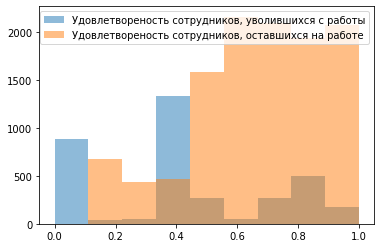

In [42]:
hr2 = hr_data[hr_data['left'] == 0]
hr3 = hr_data[hr_data['left'] == 1]
bins = np.linspace(0, 1, 10)
plt.hist(hr3.satisfaction_level, bins, alpha=0.5, label='Удовлетвореность сотрудников, уволившихся с работы')
plt.hist(hr2.satisfaction_level, bins, alpha=0.5, label='Удовлетвореность сотрудников, оставшихся на работе')
plt.legend(loc='upper right')
plt.show()

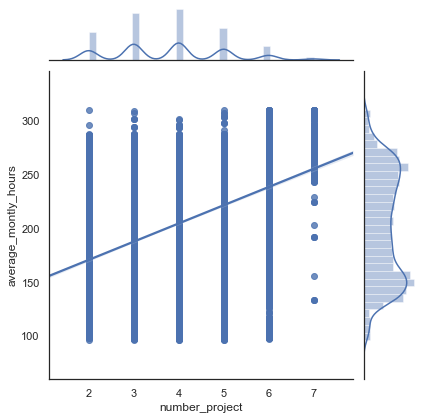

In [45]:
num_proj = hr_data['number_project']
ave_month = hr_data['average_montly_hours']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=num_proj, y=ave_month, data=hr_data, kind='reg')
plt.show()

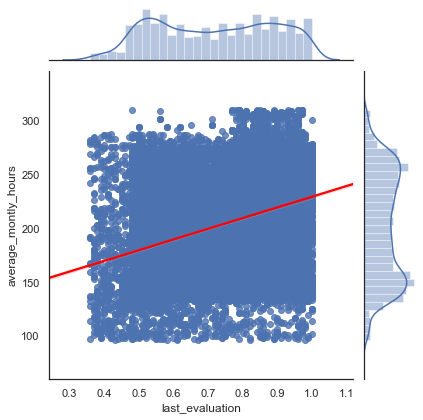

In [47]:
l_ev = hr_data['last_evaluation']
ave_month = hr_data['average_montly_hours']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=l_ev, y=ave_month, data=hr_data, kind='reg', joint_kws={'line_kws':{'color':'red'}})
plt.show()

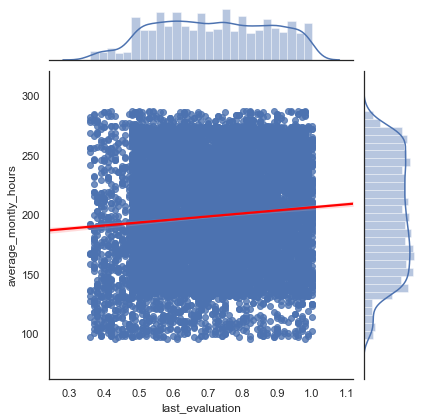

In [49]:
l_ev2 = hr2['last_evaluation']
ave_month2 = hr2['average_montly_hours']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=l_ev2, y=ave_month2, data=hr2, kind='reg', joint_kws={'line_kws':{'color':'red'}})
plt.show()

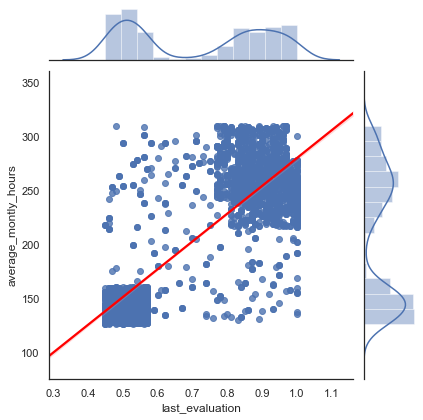

In [50]:
#Получилось, что эта корреляция по-большому счету получается исходя из оценок сотрудников, которые уже уволились.
l_ev3 = hr3['last_evaluation']
ave_month3 = hr3['average_montly_hours']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=l_ev3, y=ave_month3, data=hr3, kind='reg', joint_kws={'line_kws':{'color':'red'}})
plt.show()

In [ ]:
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [ ]:
Нулевая гипотеза - среднее значение выборки left = 1 равно среднему значению генеральной совокупности.

In [8]:
last_evaluation_left = hr_data[hr_data['left'] == 1]['last_evaluation']
stats.ttest_1samp(last_evaluation_left, hr_data['last_evaluation'].mean())

Ttest_1sampResult(statistic=0.6078870291631877, pvalue=0.5433010700614106)

In [11]:
print ('количество уволившихся =', len(last_evaluation_left))

количество уволившихся = 3571


In [ ]:
t-value =0.6078870291631877, мы его сравниваем с табличным значением 1,96 (alpha = 0.05, N=3571). 
Так как значение t-value не превышает 1.96, то мы принимаем нулевую гипотеу
(о том, что средние значения выборок равны).

In [ ]:
p-value = 0.54, что намного больше стандартной альфа ошибки 0.05, поэтому можно сказать, 
что нет статистического различия между последней оценкой уволившихся и генеральной совокупности в целом.

In [12]:
satisfaction_level_left = hr_data[hr_data['left'] == 1]['satisfaction_level']
stats.ttest_1samp(satisfaction_level_left, hr_data['satisfaction_level'].mean())

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

In [ ]:
Нулевая гипотеза отвергается, так как pvalue близко к нулю, следовательно по параметру satisfaction_level 
выборка людей, покинувших компанию, существенно отличается от генеральной совокупности.

In [ ]:
6.Рассчитать сколько работников работает в каждом департаменте

In [62]:
sales_list = hr_data.groupby('sales').count().rename(columns = {'satisfaction_level': 'count_sales'})
sales_list = sales_list.drop(['last_evaluation','number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'salary', 'salary_num'], axis='columns')
sales_list.head(20)

,count_sales
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [ ]:
7.Показать распределение сотрудников по зарплатам.

(array([7316.,    0.,    0.,    0.,    0., 6446.,    0.,    0.,    0.,
        1237.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

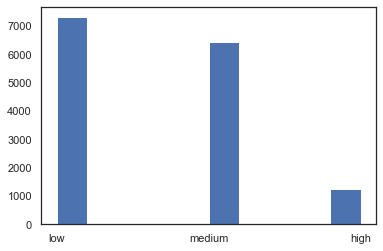

In [65]:
plt.hist(hr_data.salary)

In [ ]:
8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [96]:
it_data = hr_data[hr_data['sales']== 'IT']['salary_num']
r_data = hr_data[hr_data['sales']== 'RandD']['salary_num']
h_data = hr_data[hr_data['sales']== 'hr']['salary_num']
a_data = hr_data[hr_data['sales']== 'accounting']['salary']
mar_data = hr_data[hr_data['sales']== 'marketing']['salary']
men_data = hr_data[hr_data['sales']== 'management']['salary']
pr_data = hr_data[hr_data['sales']== 'product_mng']['salary']
tech_data = hr_data[hr_data['sales']== 'technical']['salary']
su_data = hr_data[hr_data['sales']== 'support']['salary']
sa_data = hr_data[hr_data['sales']== 'sales']['salary']


In [6]:
hr_data['one'] = hr_data.apply(lambda x: 1, axis = 1)
sales_salary = hr_data.pivot_table(
                        index='sales', 
                        columns='salary', 
                        values= 'one', 
                        aggfunc=sum).fillna(0).applymap(float)
sales_salary.head(20)

salary,high,low,medium
sales,,,
IT,83.0,609.0,535.0
RandD,51.0,364.0,372.0
accounting,74.0,358.0,335.0
hr,45.0,335.0,359.0
management,225.0,180.0,225.0
marketing,80.0,402.0,376.0
product_mng,68.0,451.0,383.0
sales,269.0,2099.0,1772.0
support,141.0,1146.0,942.0


In [16]:
sales_salary1 = sales_salary
sales_salary1['all'] = sales_salary.apply(lambda x: x['high']+x['low']+x['medium'], axis = 1)
sales_salary1['high_d'] = sales_salary1.apply(lambda x:x['high']/x['all'], axis = 1)
sales_salary1['low_d'] = sales_salary1.apply(lambda x:x['low']/x['all'], axis = 1)
sales_salary1['medium_d'] = sales_salary1.apply(lambda x:x['medium']/x['all'], axis = 1)
sales_salary1 = sales_salary1.drop(['high','low','medium', 'all'], axis='columns')
sales_salary1.head(20)

salary,high_d,low_d,medium_d
sales,,,
IT,0.067645,0.496333,0.436023
RandD,0.064803,0.462516,0.472681
accounting,0.096480,0.466754,0.436767
hr,0.060893,0.453315,0.485792
management,0.357143,0.285714,0.357143
marketing,0.093240,0.468531,0.438228
product_mng,0.075388,0.500000,0.424612
sales,0.064976,0.507005,0.428019
support,0.063257,0.514132,0.422611


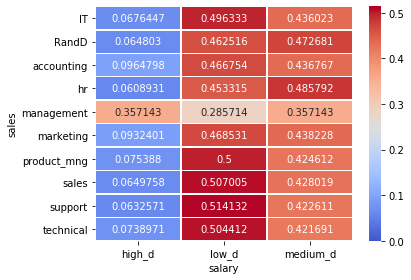

In [19]:
ax = sns.heatmap(sales_salary1, cmap= 'coolwarm', annot=True, linewidths=0.4, center = 0.25, vmin = 0, fmt='g') 
i,k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.tight_layout()

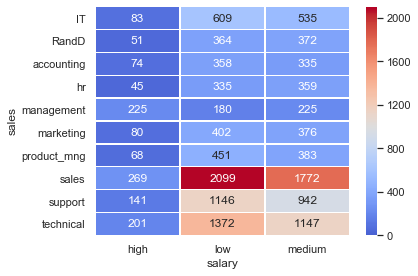

In [94]:
ax = sns.heatmap(sales_salary, cmap= 'coolwarm', annot=True, linewidths=0.4, center = 1000, vmin = 0, fmt='g') 
i,k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.tight_layout()

In [ ]:
9.Сколько сотрудников покинули компанию.

In [97]:
hr3['left'].count()

3571

In [21]:
len(hr_data)

14999

In [ ]:
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [ ]:
Гипотеза - Люди с низкой зарплатой более склонны покинуть компанию

In [15]:
from scipy.stats import spearmanr

stat, p = spearmanr(hr_data['left'], hr_data['salary_num'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.152, p=0.000
Probably dependent


In [ ]:
Вероятность того, что человек уволится, слабо коррелирует (по уровню занчимости 15%) с низким уровнем оценки заработной платы. 

In [ ]:
Гипотеза - Люди, менее удовлетворенные работой, больше увольняются. По Пирсону корреляция  = -0,39

In [16]:
from scipy.stats import kendalltau
stat, p = kendalltau(hr_data['left'], hr_data['satisfaction_level'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.301, p=0.000
Probably dependent


In [17]:
stat, p = spearmanr(hr_data['left'], hr_data['satisfaction_level'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.366, p=0.000
Probably dependent


In [ ]:
Соотвественно уровень удовлетворенности работой влияют на увольнение сотрудников. 

In [22]:
data_sales = hr_data[['sales','left']]
data_sales.head()

,sales,left
0,sales,1
1,sales,1
2,sales,1
3,sales,1
4,sales,1


In [24]:
d_s = data_sales.groupby('sales').mean()
d_s.head(10)

,left
sales,
IT,0.222494
RandD,0.153748
accounting,0.265971
hr,0.290934
management,0.144444
marketing,0.236597
product_mng,0.219512
sales,0.244928
support,0.248991


In [ ]:
Из отделов 'management' и 'RandD' сотрудники реже увольняются. Наибольшая текучесть кадров в отделе 'hr'

In [ ]:
Выводы по результатам исследований:
Таблицу коррелияции по Пирсону указывает на следующие возможные взаимосвязи: left и satisfaction_level (-0.39), 
last_evaluation и number_of_project (0.35), average_montly_hours и last_evaluation (0,34),  average_montly_hours 
и number_of_project (0,42). Исходя из этих корреляций имело смысл проверить наличие взаимосвязей с помощью визуализации. 
Когда получила график зависимости average_montly_hours и last_evaluation, на гистограмме справа было видно наличие 2 мод,
поэтому решила разбить выборку по признаку left и визуализировать взаимосвязь для каждой части:
уволившиеся сотрудники и продолжающие работать. 

Получилось, что основной для этой корреляции по-большому счету стали оценки сотрудников, которые уже уволились. 
Сотрудники, которые уволились, либо очень высоко оценивали работу,
либо выставляли очень низкие оценки. Возможно, что это связано с тем, что людям либо совсем не нравилась работа, и они уходили.
Либо это люди, которые предпочитают развиваться, и несмотря на удовлетворенность текущей работой принимают решение найти 
новое место. T-test подтвердил предположение, что выборка людей, покинувших компанию, отличается от генеральной совокупности.

Большинство сотрудников компании работают в следующих отделах: sales, technical и support. Доля специалистов с высоким уровнем 
зарплаты значительно ниже, чем сотрудников с низкой и средней зарплатой. Несмотря на это, значимой взаимосвязи между уровнем
заработной платы и увольнением сотрудников не было найдено. Возможно, если бы зарплата была выражена в денежном эквиваленте, 
а не в ранговой переменной, такая взаимосвязь могла проявится.


Распределение зарплаты по отделам имеет примерно одниковую структуру для всех отделов - преобладает низкая. Кроме менеджмента, 
где высокая зарплата встречается примерно, так же часто, как и средняя и низкая.

Около 24% сотрудников уволились за все время сбора данных по сотрудникам.